<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Perceptual_Losses_for_Real_Time_Style_Transfer_and_Super_Resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perceptual Losses for Real-Time Style Transfer and Super-Resolution**

논문 링크: https://arxiv.org/abs/1603.08155

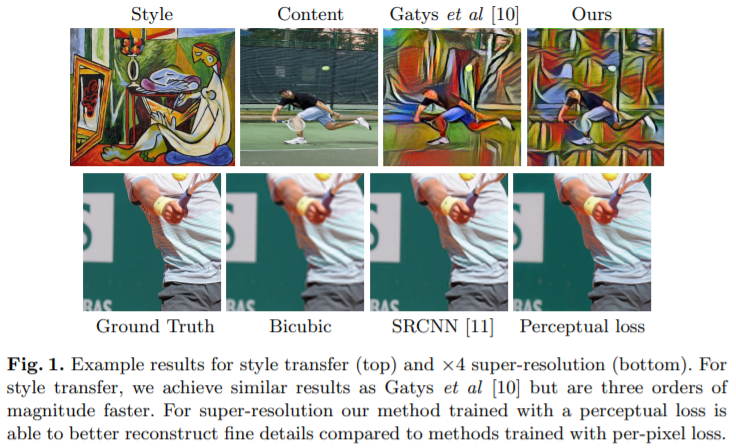

style transfer의 경우 output이 input image의 의미를 유지하면서 color이나 texture을 변형해야한다. super-resolution의 경우 시각적으로 모호한 low-resolution input image로부터 세부 사항을 추론할 수 있어야한다.

먼저 본 논문의 결과물을 보겠다. 위의 그림 Fig 1에서 알 수 있듯이 **style transfer**, **super-resolution** 총 2가지의 task를 진행하였으며, 이때 상단은 style transfer, 하단은 super-resolution이다. 

style transfer의 경우 둘다 style이 잘 전송된 것처럼 보이지만 기존의 style transfer 논문인 **Image Style Transfer Using Convolutional Neural Networks**에서는 content image와 style image를 쌍으로 넣어줘서 매번 학습을 통해 style transfer를 하기 때문에 content image가 바뀔때마다 다시 학습을 해야한다. 반면 본 논문의 경우 style image 1장을 학습시키고 그 network를 그대로 이용하기 때문에 속도의 측면에서 기존의 기법보다 **무려 3배나 더 빠르다.**(논문의 제목처럼 real-time이 가능하다.)

super-resolution의 경우 low-level pixel의 정보에만 의존하는 per pixel loss function이 아닌 high-level의 feature에 의존하는 perceptual loss function을 사용하였기 때문에 타 기법들보다 detail한 부분을 잘 추정할 수 있는 것을 알 수 있다.

## **Model**

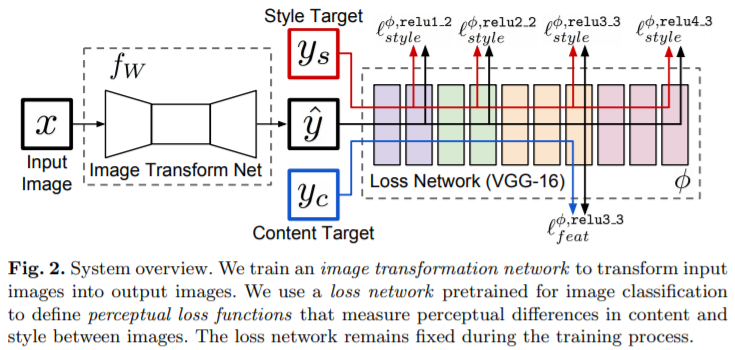

본 논문의 network는 위의 그림 Fig. 2와 같이 두 개의 요소로 구성이 된다. 첫번째는 imae transform network이고 두번째는 loss network이다.

### **Image Transformation Network**

image transformation network는 **Image Style Transfer Using Convolutional Neural Networks**에서 제안된 optimizing 문제를 해결하기 위해 훈련된 depp residual convolution neural network이다.

input image x를 output image y^로 변환을 한다. weight의 경우 y^를 사용하여 계산된 loss를 통해 backpropagation이 되며, style transfer의 경우는 style image y_s와 content image y_c가 해당하고 super-resolution의 경우는 content image y_c만 해당한다.

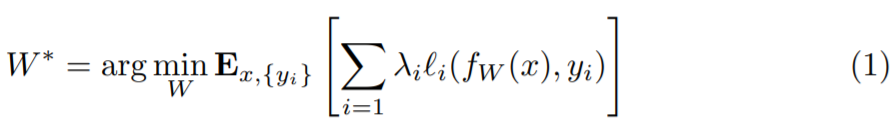

그리고 위의 식과 같이 stochastic gradient descent를 통해 train이 된다.

### **Loss Network**

loss network는 ImageNet dataset에 pretrained된 VGG-16을 사용한다. 이때 content representation(feature reconstruction loss)은 relu3_3 layer에서 진행이되며, style represtation(style reconstruction loss)은 각각 relu1_2, relu2_2, relu3_3, relu4_3에서 진행이 된다.

#### **Feature Reconstruction Loss**

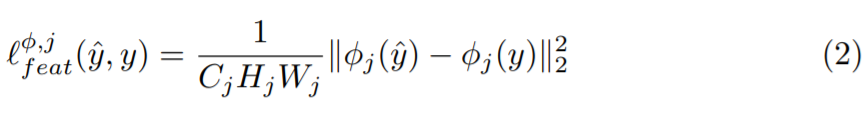

위에서 언급했듯이 output image인 y^가 target image y와 pixel이 정확히 일치하게 하는 것이 아닌 위의 식과 같이 유사한 feature representation을 갖도록 유도한다. feature representation간의 Euclidean distance를 통해 계산된다.

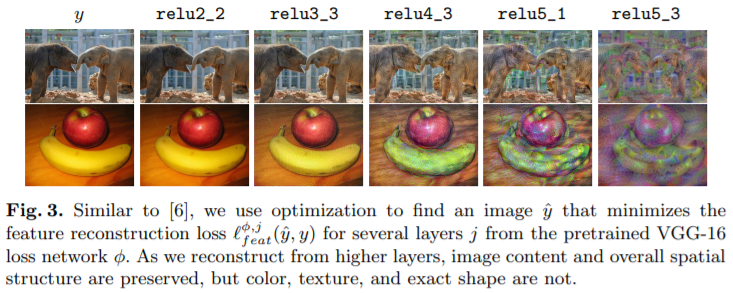

위의 그림 Fig. 3을 보면 feature reconsturction loss로 진행한 경우 higher layer일수록 image의 내용과 전체 구조는 보존이 되지만, 색상이나 질감 등 정확한 모양은 보존이 되지 않는 것을 알 수 있다.

#### **Style Reconstruction Loss**

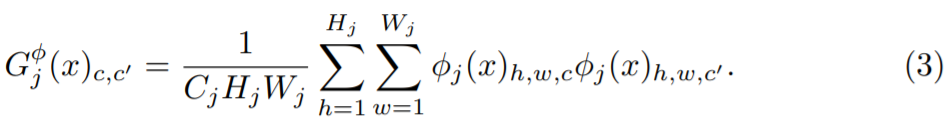

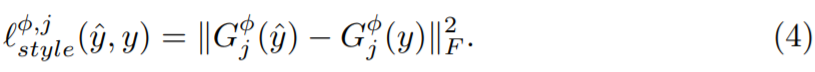

위의 두 식은 **Image Style Transfer Using Convolutional Neural Networks** 논문을 봤으면 바로 알 수 있는 식이다. (GramMSELoss)

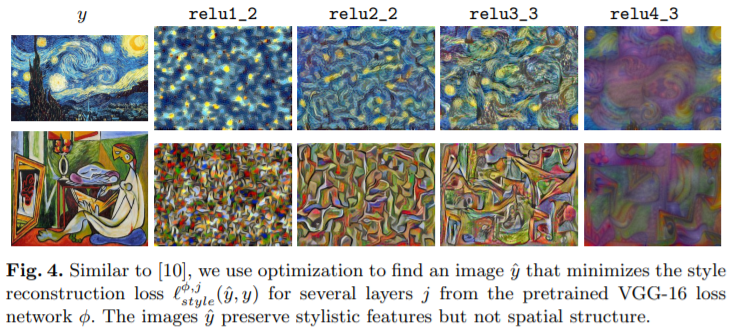

위의 그림 Fig. 4의 경우는 여러 layer j에 대해 style reconstuction loss를 최소화하는 것으로 진행한 것들이다. image의 stylistic feature는 보존되지만 공간 구조는 보존되지 않는다. 

## **Experiments**

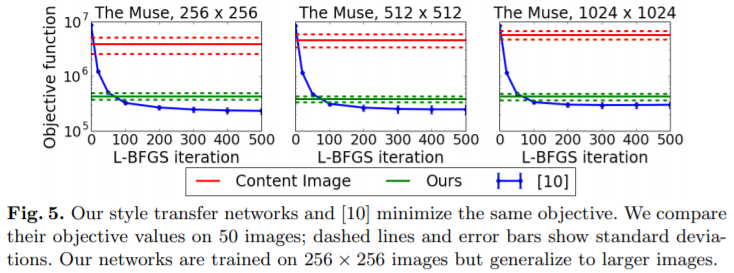

위의 그림 Fig. 5를 보면 50~100의 iterations에서 loss comparable를 달성하는 것을 알 수 있다.

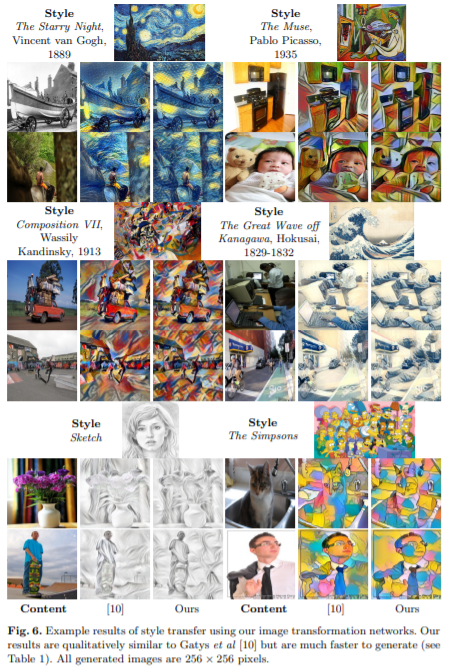

위의 그림 Fig. 6을 보면 기존의 방식과 비슷한 퀄리티를 보여주지만,

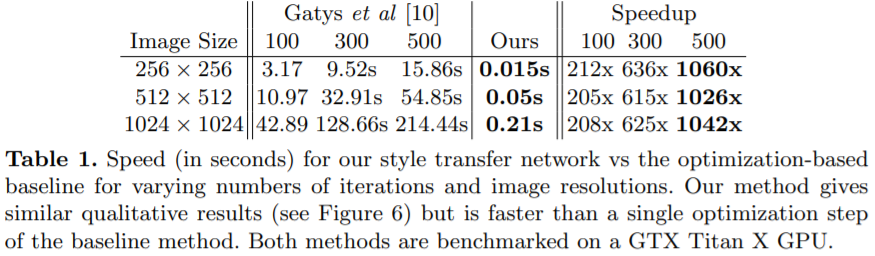

위의 표 Table 1을 보면 알 수 있듯이 생성 속도가 훨씬 빠르다는 점에서 큰 이점을 가지는 것을 알 수 있다.

하지만 큰 단점을 가지고 있는데, 하나의 style당 혹은 하나의 resolution당 하나의 network를 훈련해야 한다는 점이 비효율적이다.